<a href="https://colab.research.google.com/github/Umutyagizyerli/kvasir-classification/blob/main/KVASIR_MobileNets_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dropout,Flatten,Dense,BatchNormalization
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.models import load_model
import matplotlib.pyplot as plt

import os
import numpy as np
import glob
import shutil

import tensorflow as tf

import matplotlib.pyplot as plt

%matplotlib inline
from sklearn.metrics import classification_report, confusion_matrix , accuracy_score
import itertools

import seaborn as sns

from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam


In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=(0.5,0.9),
    shear_range=0.2,
    zoom_range=0.2,
    fill_mode='nearest',
    vertical_flip=True,
    horizontal_flip=True)

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    'Desktop/kvasir-dataset-v2/train',
    target_size=(224, 224),
    batch_size=32,
    shuffle=True,
    class_mode='categorical')

Found 6400 images belonging to 8 classes.


In [ ]:
test_generator = test_datagen.flow_from_directory(
    'Desktop/kvasir-dataset-v2/test',
    target_size=(224, 224),
    batch_size=32,
    shuffle=False,
    class_mode='categorical')

Found 1600 images belonging to 8 classes.


In [ ]:
V2= MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [ ]:
model = Sequential()
model.add(V2)
model.add(Flatten())
model.add(Dense(8, activation='softmax'))

In [ ]:
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 7, 7, 1280)        2257984   
_________________________________________________________________
flatten_2 (Flatten)          (None, 62720)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 501768    
Total params: 2,759,752
Trainable params: 2,725,640
Non-trainable params: 34,112
_________________________________________________________________


In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size//4,
    epochs=40,
    validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size//4)

Epoch 1/40
50/50 [==============================] - 137s 3s/step - loss: 1.4265 - accuracy: 0.5256 - val_loss: 5.3603 - val_accuracy: 0.0807
Epoch 2/40
50/50 [==============================] - 135s 3s/step - loss: 0.7520 - accuracy: 0.7406 - val_loss: 5.9805 - val_accuracy: 0.0938
Epoch 3/40
50/50 [==============================] - 134s 3s/step - loss: 0.6791 - accuracy: 0.7600 - val_loss: 5.4892 - val_accuracy: 0.1693
Epoch 4/40
50/50 [==============================] - 134s 3s/step - loss: 0.5162 - accuracy: 0.8175 - val_loss: 4.4472 - val_accuracy: 0.2969
Epoch 5/40
50/50 [==============================] - 134s 3s/step - loss: 0.5050 - accuracy: 0.8263 - val_loss: 5.1556 - val_accuracy: 0.3151
Epoch 6/40
50/50 [==============================] - 134s 3s/step - loss: 0.4790 - accuracy: 0.8313 - val_loss: 2.9506 - val_accuracy: 0.4505
Epoch 7/40
50/50 [==============================] - 134s 3s/step - loss: 0.3995 - accuracy: 0.8537 - val_loss: 3.6301 - val_accuracy: 0.3932
Epoch 8/40
50

In [ ]:
model.save_weights("kvasır_MobileNets_weight.h5")

In [ ]:
model.save("kvasır_MobileNets.h5")

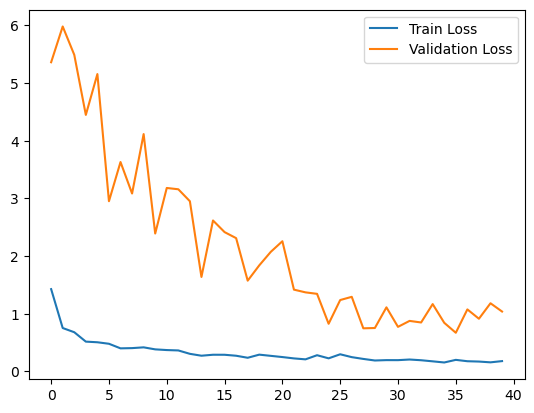

In [ ]:
plt.plot(history.history["loss"],label="Train Loss")
plt.plot(history.history["val_loss"],label="Validation Loss")
plt.legend()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

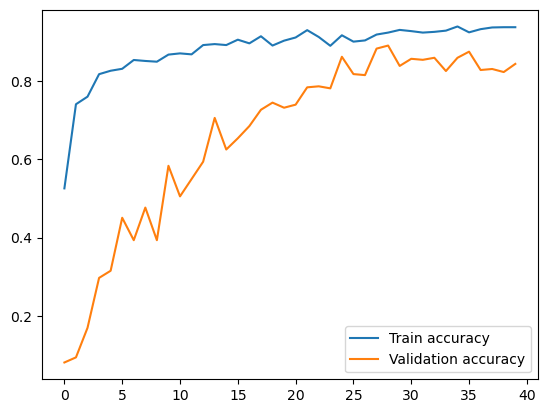

In [ ]:
plt.plot(history.history["accuracy"],label="Train accuracy")
plt.plot(history.history["val_accuracy"],label="Validation accuracy")
plt.legend()
plt.show

In [ ]:
import json
with open ("kvasır_MobileNets_history.json","w") as f:
    json.dump(history.history,f)

In [ ]:
test_loss, test_accuracy = model.evaluate(test_generator)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

50/50 [==============================] - 41s 814ms/step - loss: 0.5813 - accuracy: 0.8788
Test Loss: 0.5813325643539429
Test Accuracy: 0.8787500262260437


In [ ]:
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)

true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

report = classification_report(true_classes, predicted_classes, target_names=class_labels)

print('Classification Report:')
print(report)

Classification Report:
                        precision    recall  f1-score   support

    dyed-lifted-polyps       0.79      0.96      0.86       200
dyed-resection-margins       0.97      0.73      0.84       200
           esophagitis       0.93      0.62      0.75       200
          normal-cecum       0.99      0.88      0.93       200
        normal-pylorus       0.93      1.00      0.97       200
         normal-z-line       0.72      0.93      0.81       200
                polyps       0.96      0.91      0.93       200
    ulcerative-colitis       0.86      0.99      0.92       200

              accuracy                           0.88      1600
             macro avg       0.89      0.88      0.88      1600
          weighted avg       0.89      0.88      0.88      1600



### confusion matrix

In [ ]:
classes = ['dyed-lifted-polyps',
           'dyed-resection-margins',
           'esophagitis','normal-cecum',
           'normal-pylorus','normal-z-line',
           'polyps',
           'ulcerative-colitis']

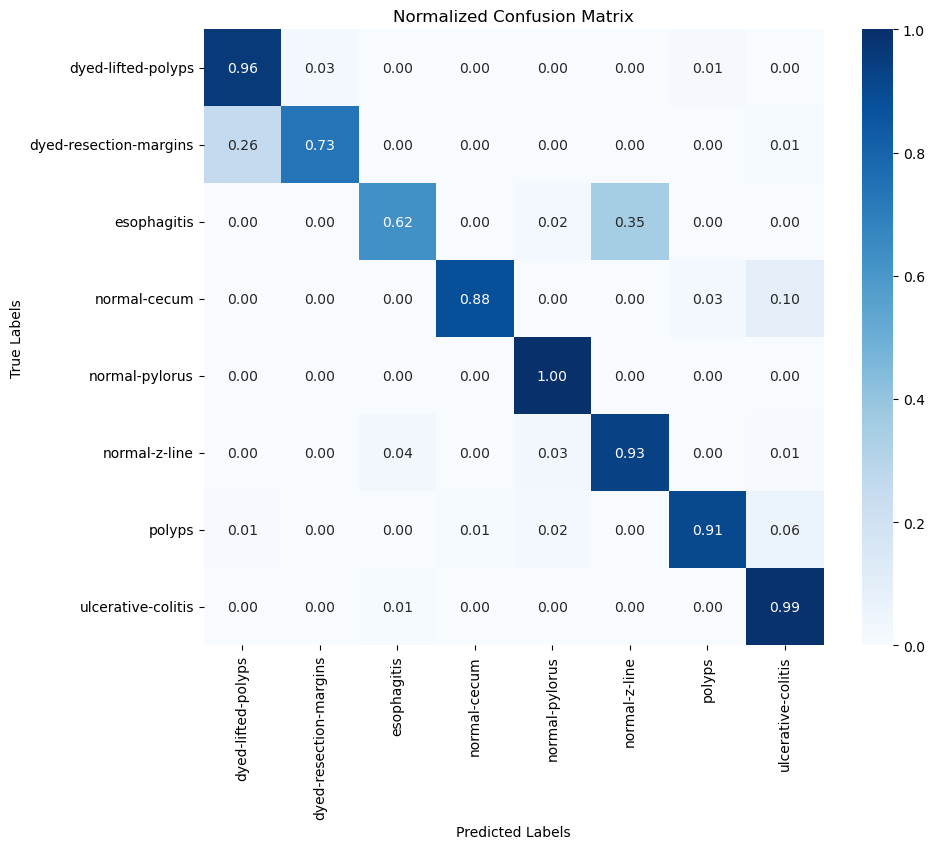

In [ ]:
y_true = test_generator.classes

y_pred = model.predict(test_generator).argmax(axis=1)

cm = confusion_matrix(y_true, y_pred)

cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(10, 8))
sns.heatmap(cm_normalized, annot=True, cmap='Blues', fmt='.2f',
            xticklabels=test_generator.class_indices.keys(),
            yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Normalized Confusion Matrix')
plt.show()
